In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:

housing_data = fetch_california_housing()


df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['MedHouseValue'] = housing_data.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Extracted california_housing dataset from the dataset library available in python.It contains data on various housing features from districts in California, with the goal of predicting the median house value (in dollars).
The dataset contains median income, houseAge, Avg bedrooms, Avg Rooms, Population, Avg Occupation, latitude,longitude and Median House Value.

In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


There are no missing data in the dataset. No missing data to handle

In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseValue,0


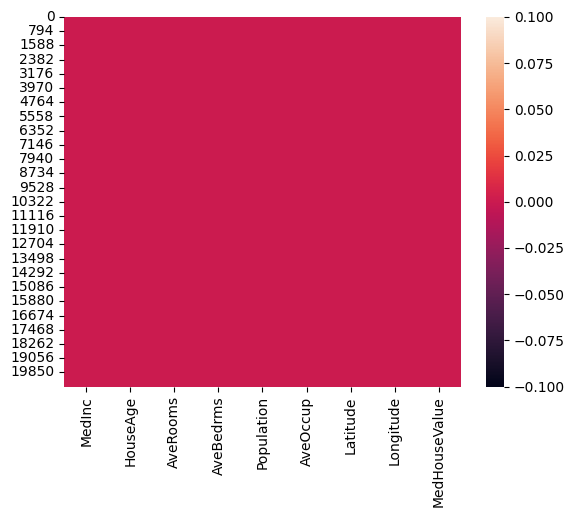

In [ ]:

sns.heatmap(df.isnull())
plt.show()


The plot below shows the correlation for the attribute of the datasset, where avg rooms and avg bedrooms have highest correlation indicating the house to be spacious and affordable for big families or bachelors.The median income and depends mostly on the no. of rooms. we could assume the house owner may be giving it to bachelors more.


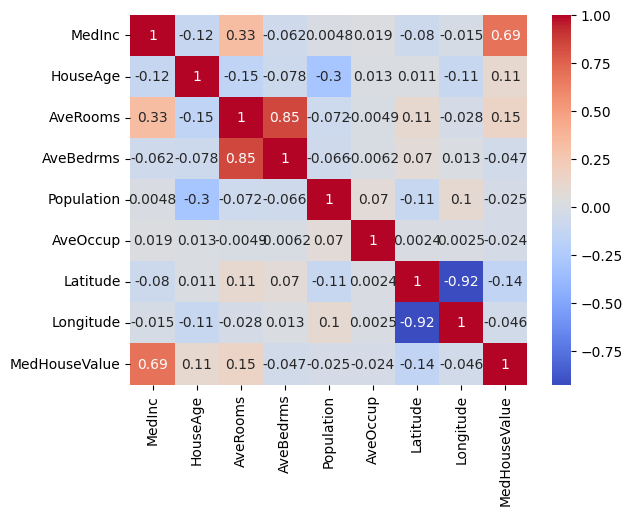

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

from the scatter plot we can assume the income recevied each month keeps increasing based on the certian factors but by inceasng the median income, the median house value  tends to increase for low profit houses. The avg rooms tends to have some affect on the house value price and the dataset contians houses within the 55 years old houses.

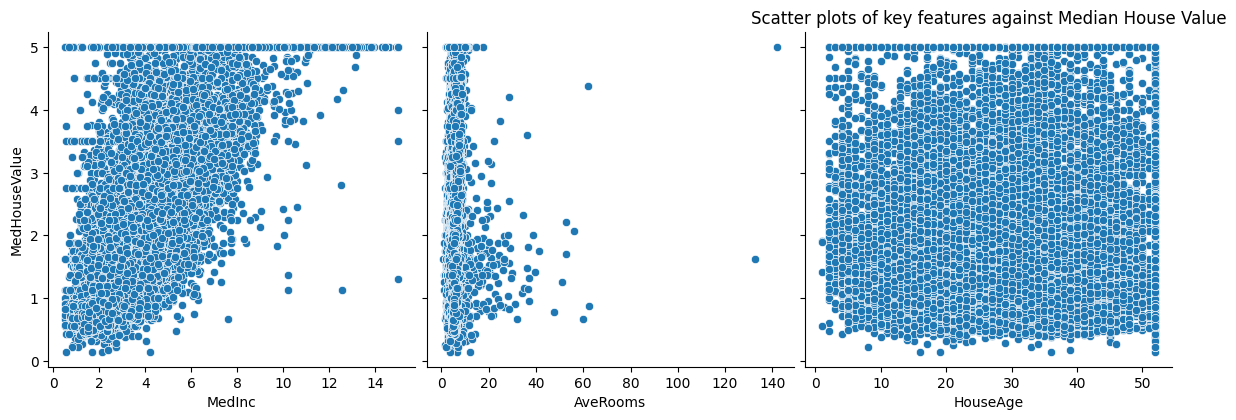

In [ ]:
sns.pairplot(df, x_vars=['MedInc', 'AveRooms', 'HouseAge'], y_vars='MedHouseValue', kind='scatter', height=4)
plt.title('Scatter plots of key features against Median House Value')
plt.show()

MedInc (Median Income) Histogram:The distribution is skewed to the right, indicating that most districts have a median income on the lower side, with fewer districts having higher median incomes.

HouseAge Histogram:The distribution of house ages shows a somewhat uniform spread with slight peaks. Specific periods of increased construction activity or a trend of preserving older houses.

AveRooms (Average Rooms) Histogram:the average number of rooms per household is  mostly between 2 and 6 rooms, with a sharp peak slightly before 5 rooms. There are very few households with an extremely high number of rooms, as seen by the long tail to the right.

Population Histogram:The majority of districts have populations below 5,000, with a significant drop as population increases.


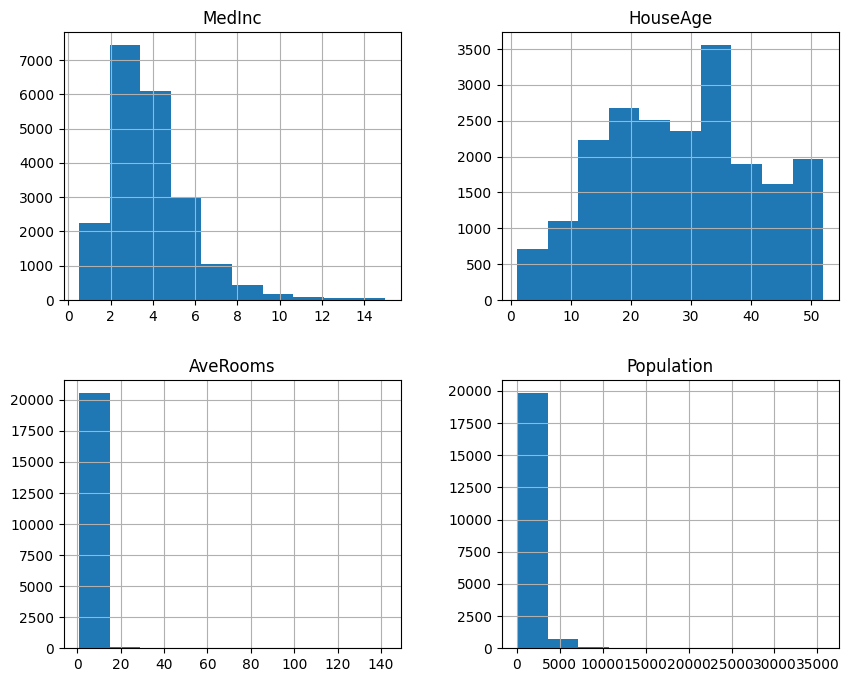

In [ ]:
df.hist(['MedInc', 'HouseAge', 'AveRooms', 'Population'], figsize=(10, 8))
plt.show()

The x contians independent variables,the y contians dependent variable, "MedHouseValue". X variable contians all attributes except "MedHouseValue". The x values are scaled using standard scalar

In [51]:
# Separate features and target
X = df.drop(columns='MedHouseValue')
y = df['MedHouseValue']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:

# Initialize the model
reg = LinearRegression()

# Train the model
reg.fit(X_train, y_train)


LinearRegression()

In [56]:

y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.5558915986952444
R-squared: 0.5757877060324508


Model Fit: The R-squared value of 0.576 indicates that the multiple regression  model provides a moderate level of fit to the data.

The Mean Squared Error (MSE) of 0.556 suggests the squared difference between the observed values and the predicted values by the model is around 0.556. Lower MSE values indicate better predictive accuracy.


In [ ]:

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)


Ridge()

In [57]:

# Predict on test set
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R-squared: {r2_ridge}")


Ridge Regression MSE: 0.5558548589435971
Ridge Regression R-squared: 0.5758157428913684


R2 is a measure of the goodness of fit of your regression model. An R² of 0.5758 suggests a moderate level of fit, indicating that while the model captures over half of the variability in house prices based on the inputs


In [58]:

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R-squared: {r2_lasso}")


Lasso Regression MSE: 0.6135115198058131
Lasso Regression R-squared: 0.5318167610318159


A higher MSE indicates greater error, and thus worse predictive accuracy. In comparison to the Ridge Regression model (MSE of 0.5559), the Lasso Regression model has a higher MSE, suggesting it is less accurate.

Lower than the R² of the Ridge Regression model (0.5758), implying that Lasso Regression explains less of the variance and is thus less effective in this instance.

In [59]:
# Ridge Regression hyperparameter tuning
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge score:", np.sqrt(-ridge_grid.best_score_))

# Lasso Regression hyperparameter tuning
lasso_params = {'alpha': [0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso score:", np.sqrt(-lasso_grid.best_score_))



Best Ridge alpha: {'alpha': 0.1}
Best Ridge score: 0.7206005824766681
Best Lasso alpha: {'alpha': 0.1}
Best Lasso score: 0.819812648366168


In [60]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{model_name} Evaluation:")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")
    print(f"MAE: {mae}")
    print("\n")



In [62]:
# Evaluate Multiple Linear Regression
evaluate_model(y_test, y_pred, "Linear Regression")

# Evaluate Ridge Regression
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

# Evaluate Lasso Regression
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Linear Regression Evaluation:
RMSE: 0.7455813830127764
R-squared: 0.5757877060324508
MAE: 0.5332001304956553


Ridge Regression Evaluation:
RMSE: 0.7455567442814779
R-squared: 0.5758157428913684
MAE: 0.5331931195789733


Lasso Regression Evaluation:
RMSE: 0.7832697618354822
R-squared: 0.5318167610318159
MAE: 0.5816074623949868




The linear regression model achieves a reasonably good fit, as indicated by the R-squared value of 0.5758. The RMSE and MAE values also indicate that the model's predictions are on average about 0.7456 and 0.5332  away from the actual values

The ridge regression model's evaluation metrics are very similar to those of the linear regression model. This suggests that the use of ridge regression did not significantly impact model performance in this case.

The lasso regression model, on the other hand, exhibits slightly inferior performance compared to linear and ridge regression models. The higher RMSE and MAE values indicate that the predictions from the lasso regression model are, on average, about 0.7833 and 0.5816  away from the actual values.